# zomato analysis

## step1 - improting libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
dataframe = pd.read_csv("Zomato_data.csv")
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [7]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## type of resturant


In [11]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'type of resturant')

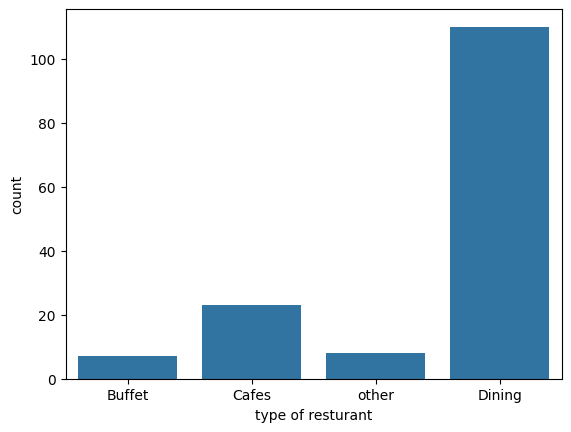

In [12]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("type of resturant")

## how many votes has each type of restaurant received

In [13]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'votes')

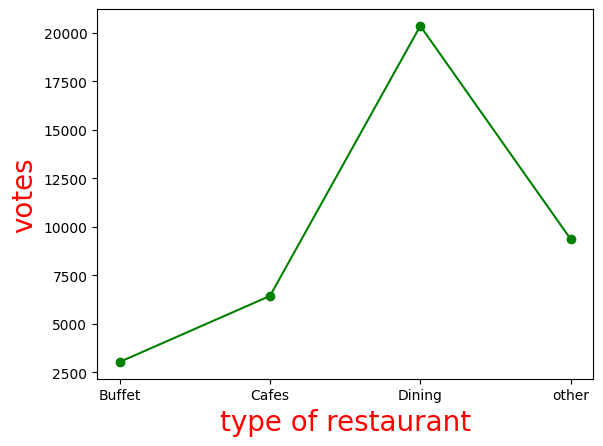

In [14]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("type of restaurant", c="red",size=20)
plt.ylabel("votes",c="red",size=20)

In [1]:
# Number of Restaurants Offering Online Orders (Bar Plot)




C:\Users\HP\AppData\Local\Temp\ipykernel_2756\1032116839.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=online_order_count.index, y=online_order_count.values, palette='coolwarm')


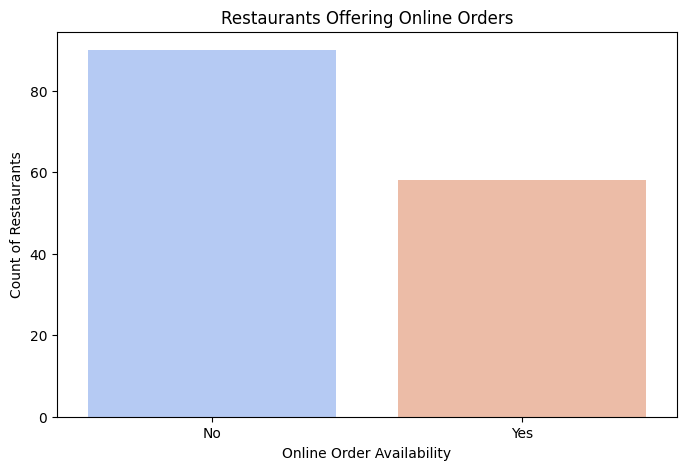

In [7]:

# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('zomato_data.csv')  # Ensure the file path is correct

# Count of restaurants offering online orders
online_order_count = df['online_order'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=online_order_count.index, y=online_order_count.values, palette='coolwarm')
plt.title('Restaurants Offering Online Orders')
plt.xlabel('Online Order Availability')
plt.ylabel('Count of Restaurants')
plt.show()


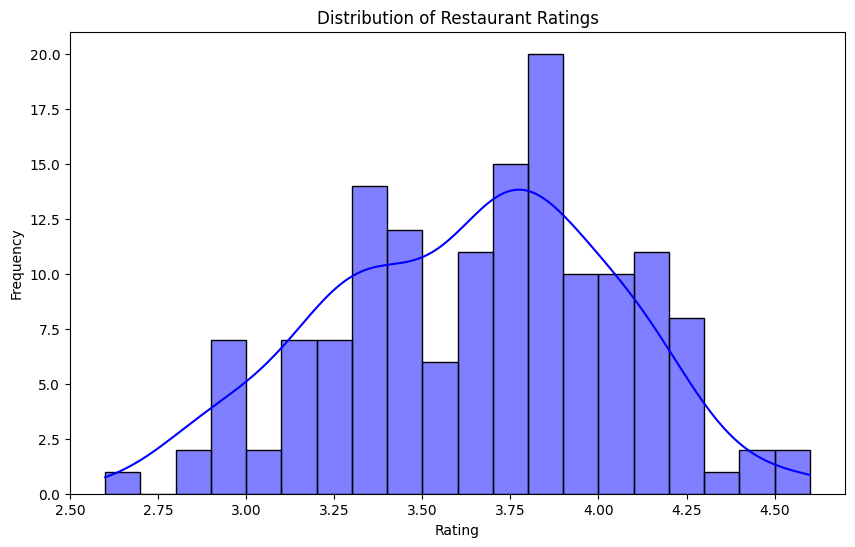

In [8]:
# Convert the 'rate' column to numeric values
df['rate'] = df['rate'].str.split('/').str[0].astype(float)

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rate'].dropna(), bins=20, kde=True, color='blue')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_2756\1646654994.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_cost_by_type.values, y=avg_cost_by_type.index, palette='Blues_r')


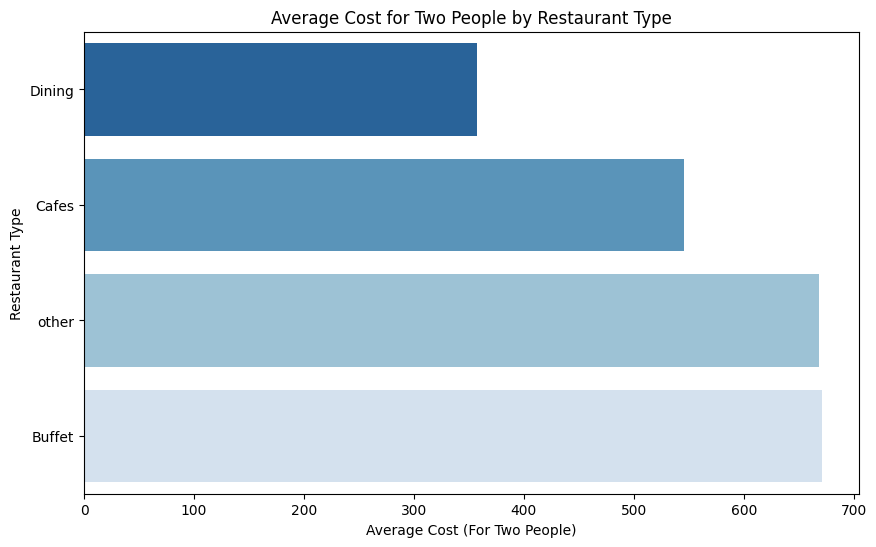

In [9]:
# Group by restaurant type and calculate average cost
avg_cost_by_type = df.groupby('listed_in(type)')['approx_cost(for two people)'].mean().sort_values()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_cost_by_type.values, y=avg_cost_by_type.index, palette='Blues_r')
plt.title('Average Cost for Two People by Restaurant Type')
plt.xlabel('Average Cost (For Two People)')
plt.ylabel('Restaurant Type')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_2756\682188915.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rate', y='name', data=top_rated, palette='Greens_r')


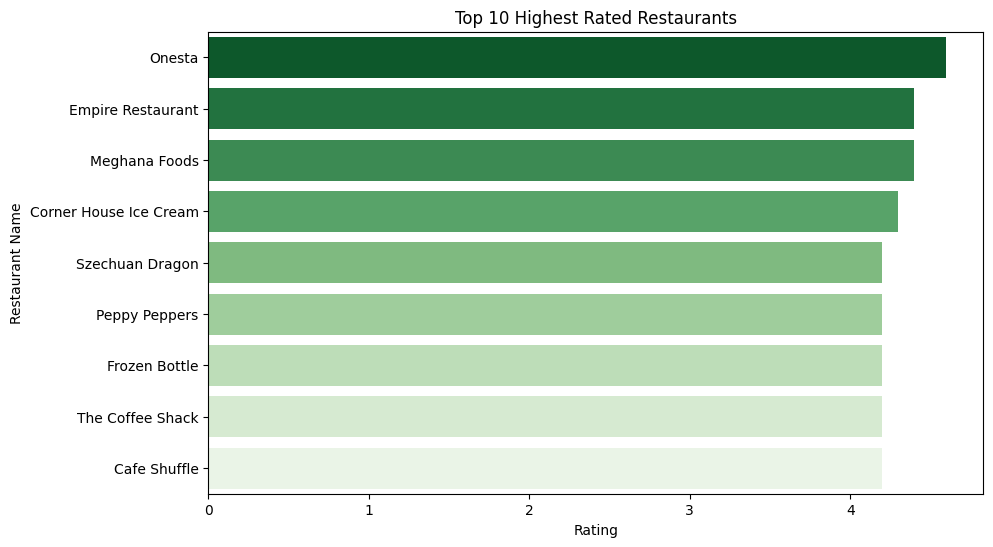

In [10]:
# Sort restaurants by rating
top_rated = df[['name', 'rate']].sort_values(by='rate', ascending=False).dropna().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='rate', y='name', data=top_rated, palette='Greens_r')
plt.title('Top 10 Highest Rated Restaurants')
plt.xlabel('Rating')
plt.ylabel('Restaurant Name')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_2756\2515877271.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='votes', data=df, palette='Set3')


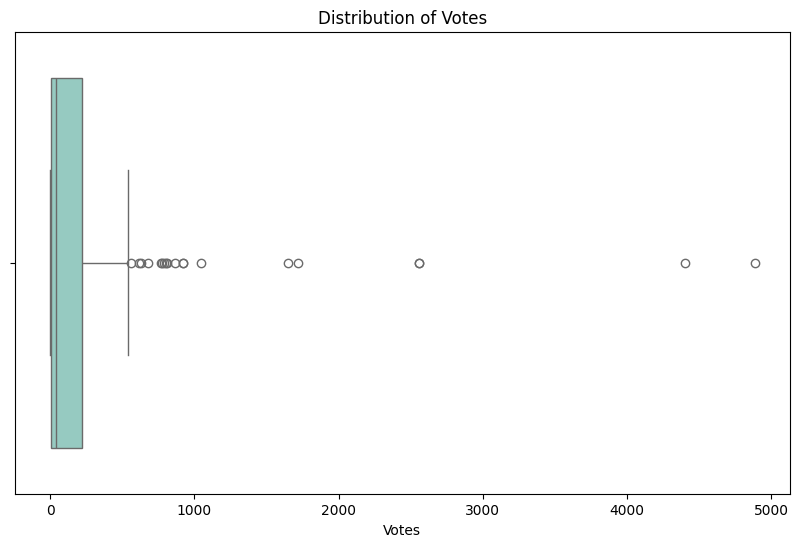

In [11]:
# Plot the distribution of votes
plt.figure(figsize=(10, 6))
sns.boxplot(x='votes', data=df, palette='Set3')
plt.title('Distribution of Votes')
plt.xlabel('Votes')
plt.show()


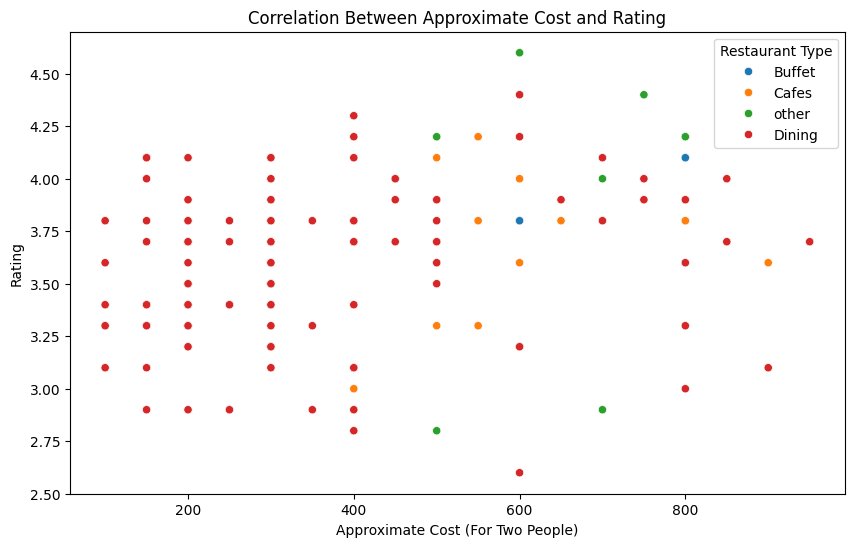

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='approx_cost(for two people)', y='rate', data=df, hue='listed_in(type)', palette='tab10')
plt.title('Correlation Between Approximate Cost and Rating')
plt.xlabel('Approximate Cost (For Two People)')
plt.ylabel('Rating')
plt.legend(title='Restaurant Type')
plt.show()

